## Setup

In [3]:
# %pylab inline
# %config InlineBackend.figure_formats = ['retina']

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

## Load the Data, Examine and Explore


In [4]:
filename = 'data/Ames_Housing_Data.tsv'
df = pd.read_csv(filename, sep='\t')

In [5]:
## Examine the columns, look at missing data
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

NoneType

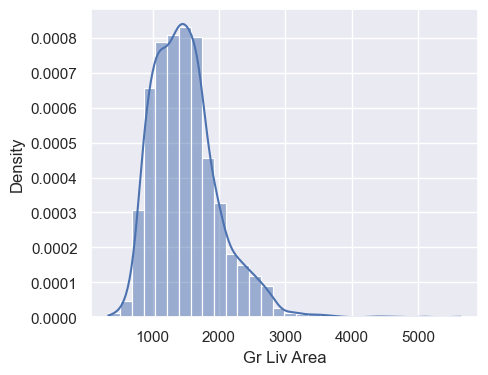

In [6]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='Gr Liv Area', stat='density', kde=True, bins=30);

In [7]:
df.shape

(2931, 82)

In [8]:
df[df['Gr Liv Area'] > 4000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1499,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1761,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1768,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
2181,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2182,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [9]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
# print("Number of rows in the data:", df.shape[0])
# print("Number of columns in the data:", df.shape[1])


In [10]:
df.shape

(2926, 82)

In [11]:
data = df.copy() # Keep a copy our original data 

In [12]:
data['PID'].unique().shape, data['Order'].unique().shape, data.shape

((2925,), (2925,), (2926, 82))

In [13]:
# Drop columns that are not useful for our model
# They contaimn unique values for each row
data = data.drop(columns=['Order', 'PID'], axis=1)

In [14]:
data.shape

(2926, 80)

## One-hot encoding for dummy variables:


In [36]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == 'object']  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RL,RH,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,IR1,Reg
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Corner,Inside,Corner,Corner
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,NAmes
Condition 1,Norm,Norm,Feedr,Norm,Norm


We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

 One-hot encoding the dummy variables:


In [37]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2926.0,1.464294e+03,8.467295e+02,1.0,7.312500e+02,1462.5,2.198750e+03,2.930000e+03
PID,2926.0,7.143288e+08,1.887272e+08,526301100.0,5.284770e+08,535453205.0,9.071801e+08,1.007100e+09
MS SubClass,2926.0,5.738380e+01,4.266706e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2436.0,6.905337e+01,2.275304e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2926.0,1.011099e+04,7.790972e+03,1300.0,7.438500e+03,9429.0,1.151875e+04,2.152450e+05
Overall Qual,2926.0,6.088175e+00,1.402714e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2926.0,5.563568e+00,1.112121e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2926.0,1.971299e+03,3.023803e+01,1872.0,1.954000e+03,1973.0,2.000750e+03,2.010000e+03
Year Remod/Add,2926.0,1.984226e+03,2.086302e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2903.0,1.007144e+02,1.760041e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


## Log transforming skew variables


In [36]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [41]:
df.dtypes[df.dtypes == 'object'].shape, df.dtypes[df.dtypes == 'int64'].shape, df.dtypes[df.dtypes == 'float64'].shape

((43,), (28,), (11,))

In [45]:
df.select_dtypes(include='number').shape

(2926, 39)

In [50]:
# Create a list of float colums to check for skewing
mask = data.dtypes == 'float' 
mask |= data.dtypes == 'int'
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [51]:
skew_vals.shape

(37,)

In [53]:
skew_vals.round(2).head()

MS SubClass      1.36
Lot Frontage     1.11
Lot Area        13.15
Overall Qual     0.17
Overall Cond     0.57
dtype: float64

In [ ]:
# Showing the skewed columns
# skew_cols = (skew_vals
#              .sort_values(ascending=False)
#              .to_frame()
#              .rename(columns={0:'Skew'})
#              .query('abs(Skew) > {}'.format(skew_limit)))

# skew_cols

In [54]:
'SalesPrice' in skew_vals

False

In [56]:
# Filter the skew columns using the skew limit
skew_vals = skew_vals[skew_vals > skew_limit].sort_values(ascending=False)

In [62]:
skew_vals.shape, len(skew_vals)

((21,), 21)

In [60]:
skew_vals.round(2).head()

Misc Val           22.23
Pool Area          18.75
Lot Area           13.15
Low Qual Fin SF    12.11
3Ssn Porch         11.40
dtype: float64

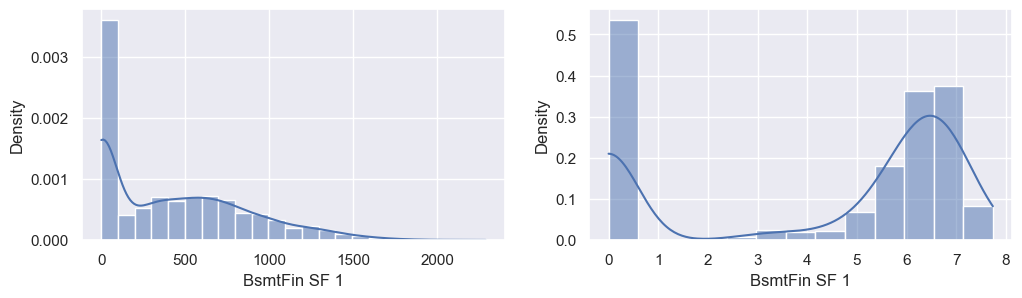

In [ ]:
# Apply np.log1p to 'BsmtFin SF 1' and plot histogram before and after transformation
field = 'BsmtFin SF 1'
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BsmtFin SF 1', stat='density', kde=True);
plt.subplot(1, 2, 2)
sns.histplot(data=np.log1p(df['BsmtFin SF 1']), stat='density', kde=True);

In [66]:
skew_vals.index, len (skew_vals.index)

(Index(['Misc Val', 'Pool Area', 'Lot Area', 'Low Qual Fin SF', '3Ssn Porch',
        'Kitchen AbvGr', 'BsmtFin SF 2', 'Enclosed Porch', 'Bsmt Half Bath',
        'Screen Porch', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF',
        'SalePrice', 'MS SubClass', 'Lot Frontage', '1st Flr SF', 'Bsmt Unf SF',
        'Gr Liv Area', '2nd Flr SF', 'BsmtFin SF 1'],
       dtype='object'),
 21)

In [67]:
# Apply np.log1p to all columns with skew > 0.75 except 'SalePrice'
for col in skew_vals.index:
    if col != 'SalePrice':
        df[col] = np.log1p(df[col])

In [ ]:
# # Let's look at what happens to one of these features, when we apply np.log1p visually.

# # Choose a field
# field = "BsmtFin SF 1"

# # Create two "subplots" and a "figure" using matplotlib
# fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# # Create a histogram on the "ax_before" subplot
# df[field].hist(ax=ax_before)

# # Apply a log transformation (numpy syntax) to this column
# df[field].apply(np.log1p).hist(ax=ax_after)

# # Formatting of titles etc. for each subplot
# ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
# ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
# fig.suptitle('Field "{}"'.format(field));

In [ ]:
# # Perform the skew transformation:

# for col in skew_cols.index.values:
#     if col == "SalePrice":
#         continue
#     df[col] = df[col].apply(np.log1p)

In [ ]:
# We now have a larger set of potentially-useful features
df.shape

In [ ]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
df = data
data.isnull().sum().sort_values()

 Let's pick out just a few numeric columns to illustrate basic feature transformations.


In [21]:
data.isnull().sum().sort_values(ascending=False).head(10)

Pool QC          2915
Misc Feature     2821
Alley            2728
Fence            2355
Mas Vnr Type     1774
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Yr Blt     159
Garage Finish     159
dtype: int64

In [20]:
cols_subset = ['Lot Area', 'Overall Qual', 'Overall Cond', 
                'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                'Garage Cars','SalePrice']

In [23]:
data.isnull().sum()[cols_subset]

Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Gr Liv Area       0
Full Bath         0
Bedroom AbvGr     0
Fireplaces        0
Garage Cars       1
SalePrice         0
dtype: int64

In [24]:
smaller_df= df.loc[:, cols_subset]

In [33]:
data[cols_subset].shape, smaller_df.shape

((2926, 11), (2926, 11))

In [28]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2926.0,10110.99,7790.97,1300.0,7438.5,9429.0,11518.75,215245.0
Overall Qual,2926.0,6.09,1.40,1.0,5.0,6.0,7.00,10.0
Overall Cond,2926.0,5.56,1.11,1.0,5.0,5.0,6.00,9.0
Year Built,2926.0,1971.30,30.24,1872.0,1954.0,1973.0,2000.75,2010.0
Year Remod/Add,2926.0,1984.23,20.86,1950.0,1965.0,1993.0,2004.00,2010.0
Gr Liv Area,2926.0,1494.03,486.20,334.0,1126.0,1441.5,1740.00,3820.0
Full Bath,2926.0,1.56,0.55,0.0,1.0,2.0,2.00,4.0
Bedroom AbvGr,2926.0,2.85,0.83,0.0,2.0,3.0,3.00,8.0
Fireplaces,2926.0,0.60,0.65,0.0,0.0,1.0,1.00,4.0
Garage Cars,2925.0,1.77,0.76,0.0,1.0,2.0,2.00,5.0


In [29]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2926 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.3 KB


In [30]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [31]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
 10  SalePrice       2926 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.3 KB



## Basic Feature Engineering
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!


In [ ]:
# sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

---
**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

---


#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.


In [34]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.5 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model. 

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward. 


Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.


### Basic feature engineering: adding polynomial and interaction terms


One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets. 
### Polynomial Features


In [ ]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2


As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions


In [ ]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']



-----
**Interaction Feature Exercise**: What other interactions do you think might be helpful? Why? 

-----


## Categories and features derived from category aggregates 


Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.


In [38]:
data['House Style'].value_counts()

House Style
1Story    1481
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:


In [40]:
pd.get_dummies(data['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False


We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.


In [42]:
nbh_counts = data.Neighborhood.value_counts()
nbh_counts

Neighborhood
NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.


In [43]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [ ]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')


## Getting to fancier features

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!


In [47]:
data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [49]:
data.groupby('Neighborhood')['Overall Qual'].mean().head()

Neighborhood
Blmngtn    7.142857
Blueste    6.600000
BrDale     5.733333
BrkSide    5.120370
ClearCr    5.977273
Name: Overall Qual, dtype: float64

In [ ]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.


In [ ]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


## Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`


In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [52]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [54]:
pf.get_feature_names_out(features)

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [56]:
feat_array = pf.transform(df[features])

In [57]:
type(feat_array), feat_array.shape

(numpy.ndarray, (2926, 6))

In [59]:
df_poly = pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

In [61]:
df_poly.head()

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
2,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
3,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
4,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0


## Recap

While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of [*Pareto principle*](https://en.wikipedia.org/wiki/Pareto_principle?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01), where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model. 


---
### Machine Learning Foundation (C) 2020 IBM Corporation
